# Notebook 기본 세팅

In [44]:
# Constant 선언

# 프로젝트 루트 디렉토리를 식별하기 위한 마커 파일 이름
ROOT_MARKER = "pyproject.toml"

# 한글 표시를 위한 나눔바른고딕 폰트 파일 이름
# matplotlib 의 font_manager 에 실제 폰트 파일의 위치를 넣어주어야 한다.
KOREAN_FONT_FILE = "NanumBarunGothic.ttf"

# matplotlib 에서는 font-family 의 이름으로 font 를 설정한다.
# 그래서 font 파일 그 자체가 아니라, 그 파일의 family 이름을 적어준다.
KOREAN_FONT_FAMILY = "NanumBarunGothic"

# 참고
# Font Family 와 Font File 의 차이는,
# Font Family 는 비슷한 디자인 특성을 공유하는 글꼴 그룹을 의미한다.
#
# 예를 들어 '나눔바른고딕' 폰트 패밀리는 일반(Regular), 굵게(Bold), 기울임(Italic) 등 여러 스타일을 포함할 수 있다.
# 반면, 폰트 파일(.ttf, .otf 등)은 이러한 폰트의 하나의 스타일이 저장된 실제 파일이다.
#
# 이 프로젝트에서는 폰트 용량을 줄이기 위해 일반(Regular) 인 NanumBarunGothic.ttf 만 사용한다.

In [45]:
# 프로젝트 root 를 sys.path 에 추가해서 import 구문을 사용하기 쉽게
from pathlib import Path


def find_project_root() -> Path:
    """
    pyproject.toml 파일을 기준으로 루트 디렉토리를 찾는다.
    :return: Path: 프로젝트 루트 디렉토리 경로
    """

    current_path = Path().resolve()

    while current_path != current_path.parent:
        if (current_path / ROOT_MARKER).exists():
            return current_path

        current_path = current_path.parent

    raise FileNotFoundError("프로젝트 루트 디렉토리를 찾을 수 없습니다.")


ROOT_DIR = find_project_root()

### EDA 진행

In [46]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager


KOREAN_FONT_FILE = "/opt/project/notebooks/fonts/NanumBarunGothic.ttf" 
KOREAN_FONT_FAMILY = "NanumBarunGothic"

# 폰트 파일 존재 확인

plt.rcParams['font.family'] = KOREAN_FONT_FAMILY
plt.rcParams['axes.unicode_minus'] = False

In [47]:
file_path= "/opt/project/src/data/weather_96stations_5years.csv"

df = pd.read_csv(file_path, encoding= 'utf-8')

In [48]:
df.shape

(169164, 62)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169164 entries, 0 to 169163
Data columns (total 62 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   stnId           169164 non-null  int64  
 1   stnNm           169164 non-null  object 
 2   tm              169164 non-null  object 
 3   avgTa           168940 non-null  float64
 4   minTa           169070 non-null  float64
 5   minTaHrmt       169071 non-null  float64
 6   maxTa           169073 non-null  float64
 7   maxTaHrmt       169074 non-null  float64
 8   mi10MaxRn       42587 non-null   float64
 9   mi10MaxRnHrmt   29126 non-null   float64
 10  hr1MaxRn        42557 non-null   float64
 11  hr1MaxRnHrmt    30128 non-null   float64
 12  sumRnDur        16932 non-null   float64
 13  sumRn           65473 non-null   float64
 14  maxInsWs        168906 non-null  float64
 15  maxInsWsWd      168907 non-null  float64
 16  maxInsWsHrmt    168908 non-null  float64
 17  maxWs     

In [50]:
df.describe

<bound method NDFrame.describe of         stnId stnNm          tm  avgTa  minTa  minTaHrmt  maxTa  maxTaHrmt  \
0          90    속초  2020-01-01    0.8   -3.4       24.0    4.8     1330.0   
1          90    속초  2020-01-02    2.8   -2.1       37.0    6.6     1428.0   
2          90    속초  2020-01-03    4.7    0.8      638.0    8.5     1256.0   
3          90    속초  2020-01-04    4.0    1.1     2400.0    8.1     1353.0   
4          90    속초  2020-01-05    3.1   -0.6      547.0    8.8     1350.0   
...       ...   ...         ...    ...    ...        ...    ...        ...   
169159    295    남해  2024-12-27    3.4    0.4      109.0    6.3     1347.0   
169160    295    남해  2024-12-28    2.2    0.1      700.0    4.2     1306.0   
169161    295    남해  2024-12-29    4.5    1.4     2239.0    9.4     1517.0   
169162    295    남해  2024-12-30    6.7    0.2      802.0   12.3     1417.0   
169163    295    남해  2024-12-31    5.5   -0.4     2351.0    9.6     1456.0   

        mi10MaxRn  mi10MaxRnH

In [51]:
df.head()

,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,...,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur
0,90,속초,2020-01-01,0.8,-3.4,24.0,4.8,1330.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90,속초,2020-01-02,2.8,-2.1,37.0,6.6,1428.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,90,속초,2020-01-03,4.7,0.8,638.0,8.5,1256.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90,속초,2020-01-04,4.0,1.1,2400.0,8.1,1353.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,90,속초,2020-01-05,3.1,-0.6,547.0,8.8,1350.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df.tail()

,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,...,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur
169159,295,남해,2024-12-27,3.4,0.4,109.0,6.3,1347.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169160,295,남해,2024-12-28,2.2,0.1,700.0,4.2,1306.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169161,295,남해,2024-12-29,4.5,1.4,2239.0,9.4,1517.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169162,295,남해,2024-12-30,6.7,0.2,802.0,12.3,1417.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169163,295,남해,2024-12-31,5.5,-0.4,2351.0,9.6,1456.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df.columns

Index(['stnId', 'stnNm', 'tm', 'avgTa', 'minTa', 'minTaHrmt', 'maxTa',
       'maxTaHrmt', 'mi10MaxRn', 'mi10MaxRnHrmt', 'hr1MaxRn', 'hr1MaxRnHrmt',
       'sumRnDur', 'sumRn', 'maxInsWs', 'maxInsWsWd', 'maxInsWsHrmt', 'maxWs',
       'maxWsWd', 'maxWsHrmt', 'avgWs', 'hr24SumRws', 'maxWd', 'avgTd',
       'minRhm', 'minRhmHrmt', 'avgRhm', 'avgPv', 'avgPa', 'maxPs',
       'maxPsHrmt', 'minPs', 'minPsHrmt', 'avgPs', 'ssDur', 'sumSsHr',
       'hr1MaxIcsrHrmt', 'hr1MaxIcsr', 'sumGsr', 'ddMefs', 'ddMefsHrmt',
       'ddMes', 'ddMesHrmt', 'sumDpthFhsc', 'avgTca', 'avgLmac', 'avgTs',
       'minTg', 'avgCm5Te', 'avgCm10Te', 'avgCm20Te', 'avgCm30Te', 'avgM05Te',
       'avgM10Te', 'avgM15Te', 'avgM30Te', 'avgM50Te', 'sumLrgEv', 'sumSmlEv',
       'n99Rn', 'iscs', 'sumFogDur'],
      dtype='object')

In [54]:
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) *100

missing_df = pd.DataFrame({
    '결측치 개수': missing_count,
    '결측치 비율(%)' : missing_percent
})

print(missing_df)

           결측치 개수  결측치 비율(%)
stnId           0   0.000000
stnNm           0   0.000000
tm              0   0.000000
avgTa         224   0.132416
minTa          94   0.055567
...           ...        ...
sumLrgEv    82753  48.918801
sumSmlEv    82753  48.918801
n99Rn      153989  91.029415
iscs       142395  84.175711
sumFogDur  166394  98.362536

[62 rows x 2 columns]


In [55]:
missing_exist_df = missing_df[missing_df['결측치 개수'] > 0].sort_values('결측치 비율(%)', ascending=False)

print(missing_exist_df)

                결측치 개수  결측치 비율(%)
ddMefsHrmt      168121  99.383439
sumDpthFhsc     168031  99.330236
ddMefs          168026  99.327280
ddMesHrmt       167391  98.951905
ddMes           167369  98.938900
sumFogDur       166394  98.362536
n99Rn           153989  91.029415
sumRnDur        152232  89.990778
avgM30Te        145051  85.745785
avgM50Te        145046  85.742829
avgM05Te        145038  85.738100
avgM10Te        145024  85.729824
avgM15Te        145023  85.729233
iscs            142395  84.175711
mi10MaxRnHrmt   140038  82.782389
hr1MaxRnHrmt    139036  82.190064
hr1MaxRn        126607  74.842756
mi10MaxRn       126577  74.825022
avgCm5Te        118683  70.158544
avgCm20Te       118648  70.137854
avgCm10Te       118635  70.130170
avgCm30Te       118583  70.099430
sumRn           103691  61.296139
sumLrgEv         82753  48.918801
sumSmlEv         82753  48.918801
sumGsr           81541  48.202336
hr1MaxIcsr       81510  48.184011
hr1MaxIcsrHrmt   81455  48.151498
avgLmac       

## 수치형 분석

In [56]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numerical_cols)>0:
    print(f"수치형 변수: {numerical_cols}\n")
    print(f"기술 통계량:\n {df[numerical_cols].describe()}")

수치형 변수: ['stnId', 'avgTa', 'minTa', 'minTaHrmt', 'maxTa', 'maxTaHrmt', 'mi10MaxRn', 'mi10MaxRnHrmt', 'hr1MaxRn', 'hr1MaxRnHrmt', 'sumRnDur', 'sumRn', 'maxInsWs', 'maxInsWsWd', 'maxInsWsHrmt', 'maxWs', 'maxWsWd', 'maxWsHrmt', 'avgWs', 'hr24SumRws', 'maxWd', 'avgTd', 'minRhm', 'minRhmHrmt', 'avgRhm', 'avgPv', 'avgPa', 'maxPs', 'maxPsHrmt', 'minPs', 'minPsHrmt', 'avgPs', 'ssDur', 'sumSsHr', 'hr1MaxIcsrHrmt', 'hr1MaxIcsr', 'sumGsr', 'ddMefs', 'ddMefsHrmt', 'ddMes', 'ddMesHrmt', 'sumDpthFhsc', 'avgTca', 'avgLmac', 'avgTs', 'minTg', 'avgCm5Te', 'avgCm10Te', 'avgCm20Te', 'avgCm30Te', 'avgM05Te', 'avgM10Te', 'avgM15Te', 'avgM30Te', 'avgM50Te', 'sumLrgEv', 'sumSmlEv', 'n99Rn', 'sumFogDur']

기술 통계량:
                stnId          avgTa          minTa      minTaHrmt  \
count  169164.000000  168940.000000  169070.000000  169071.000000   
mean      196.586874      13.733122       9.085745     910.828504   
std        64.537329       9.618708      10.313592     778.908674   
min        90.000000    

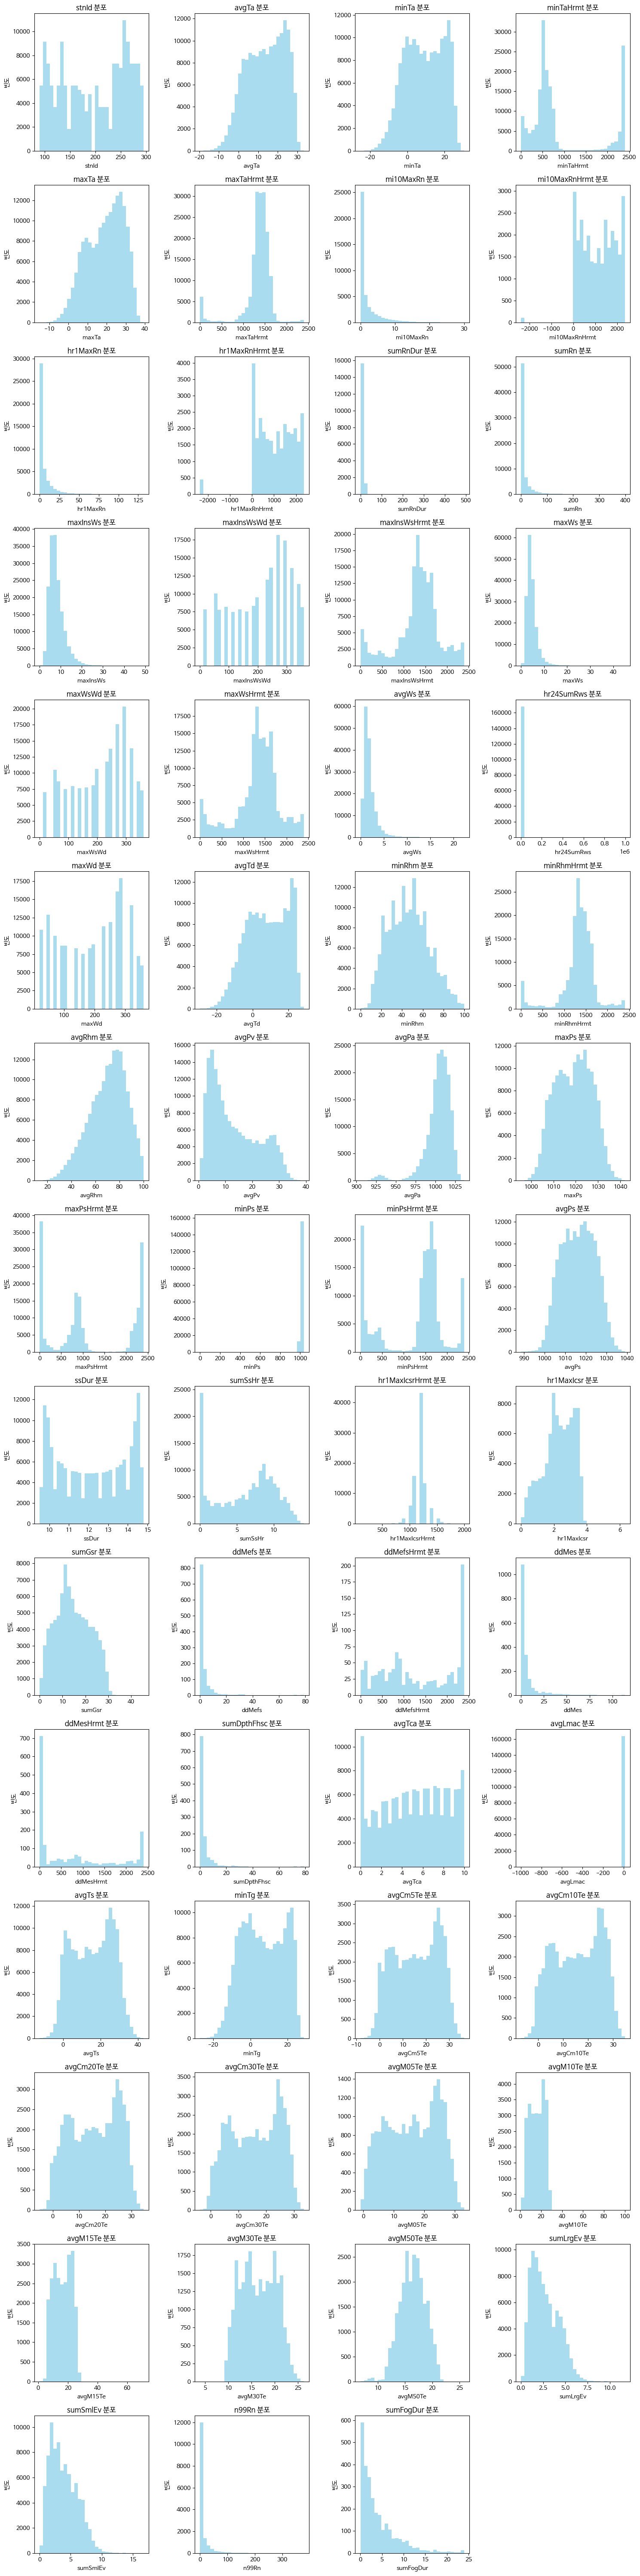

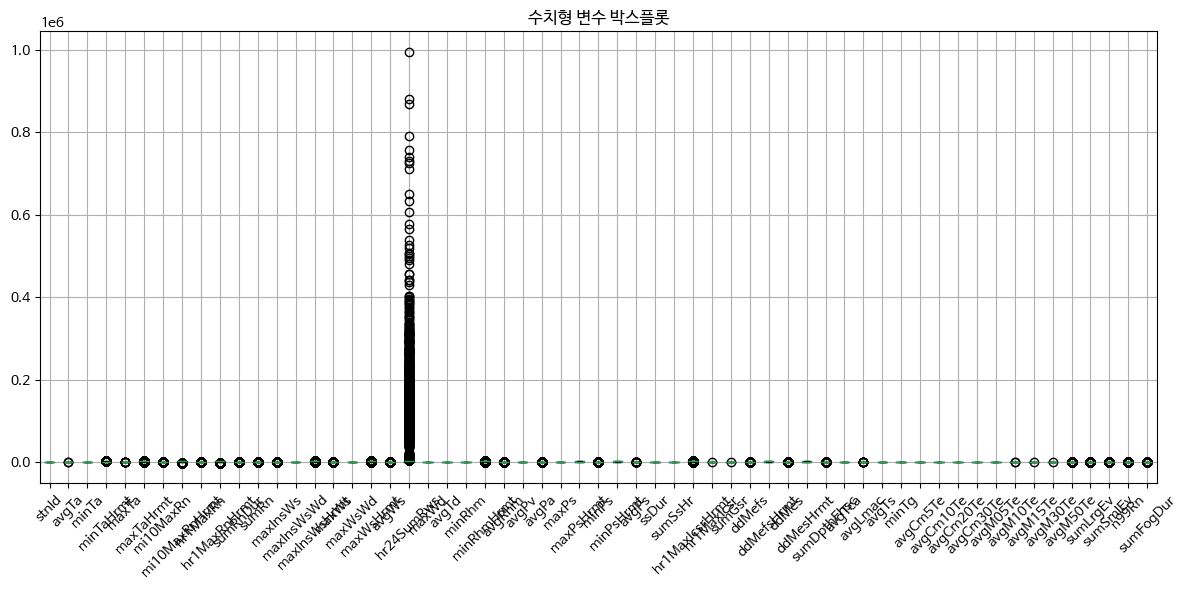

In [57]:
# 히스토그램
n_cols = min(4, len(numerical_cols))
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
if n_rows == 1 and n_cols == 1:
    axes = [axes]
elif n_rows == 1:
    axes = axes
else:
    axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if n_rows == 1 and n_cols == 1:
        ax = axes[0]
    else:
        ax = axes[i]
    ax.hist(df[col].dropna(), bins=30, alpha=0.7, color='skyblue')
    ax.set_title(f'{col} 분포')
    ax.set_xlabel(col)
    ax.set_ylabel('빈도')

# 빈 subplot 제거
if n_rows > 1 or n_cols > 1:
    for i in range(len(numerical_cols), len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# 박스플롯
if len(numerical_cols) > 1:
    plt.figure(figsize=(12, 6))
    df[numerical_cols].boxplot(rot=45)
    plt.title('수치형 변수 박스플롯')
    plt.tight_layout()
    plt.show()
elif len(numerical_cols) == 1:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[numerical_cols[0]].dropna())
    plt.title(f'{numerical_cols[0]} 박스플롯')
    plt.ylabel(numerical_cols[0])
    plt.show()

## 범주형 변수 분석

In [58]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

if len(categorical_cols)>0:
    print(f"범주형 변수: {categorical_cols}")

범주형 변수: ['stnNm', 'tm', 'iscs']


In [59]:
for col in categorical_cols:
    print("{col}변수:")
    value_counts = df[col].value_counts()
    print(value_counts)

{col}변수:
stnNm
속초     1827
양평     1827
순창군    1827
김해시    1827
고창군    1827
       ... 
성산     1461
제주     1461
완도     1461
영천     1461
고창     1460
Name: count, Length: 95, dtype: int64
{col}변수:
tm
2022-07-02    95
2023-04-12    95
2023-05-08    95
2023-05-07    95
2023-05-06    95
              ..
2020-09-03    84
2020-09-04    84
2020-09-05    84
2020-09-06    84
2020-01-01    84
Name: count, Length: 1827, dtype: int64
{col}변수:
iscs
-{황사}-{황사}{강도0}0300-{황사}{강도0}0600-{황사}{강도0}0900-{황사}{강도0}1200-{황사}{강도0}1500-{황사}{강도0}1800-{황사}{강도0}2100-{황사}{강도0}2400-                                         34
{박무}2350-{박무}{강도0}2400-                                                                                                                                        21
{박무}2340-{박무}{강도0}2400-                                                                                                                                        16
{박무}2355-{박무}{강도0}2400-                                                     

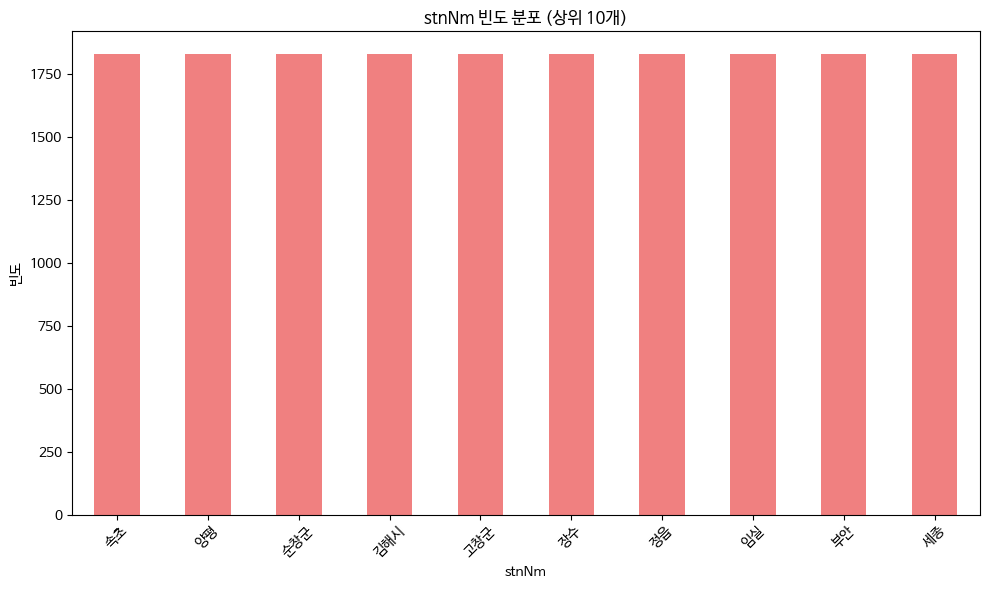

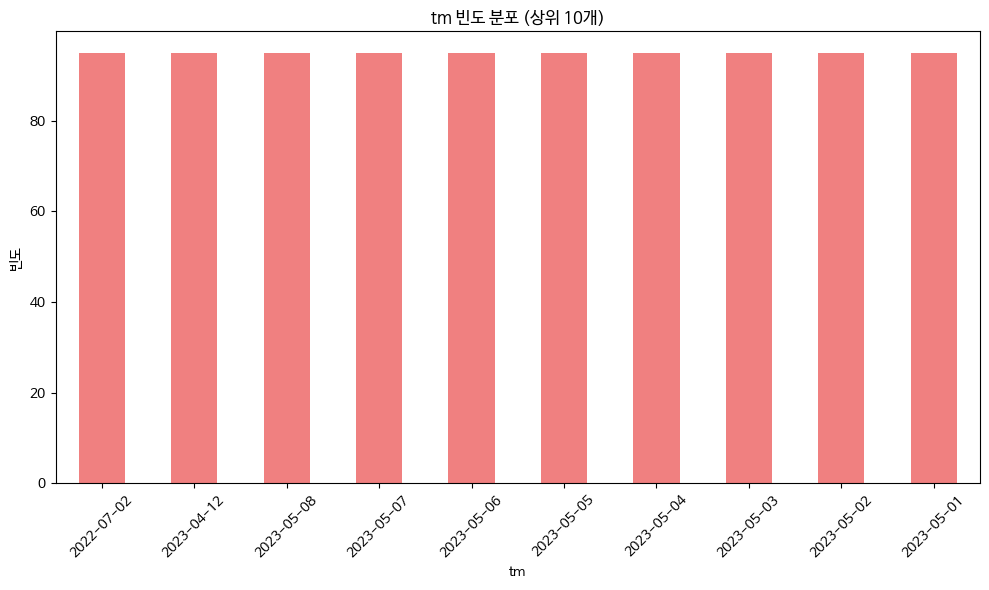

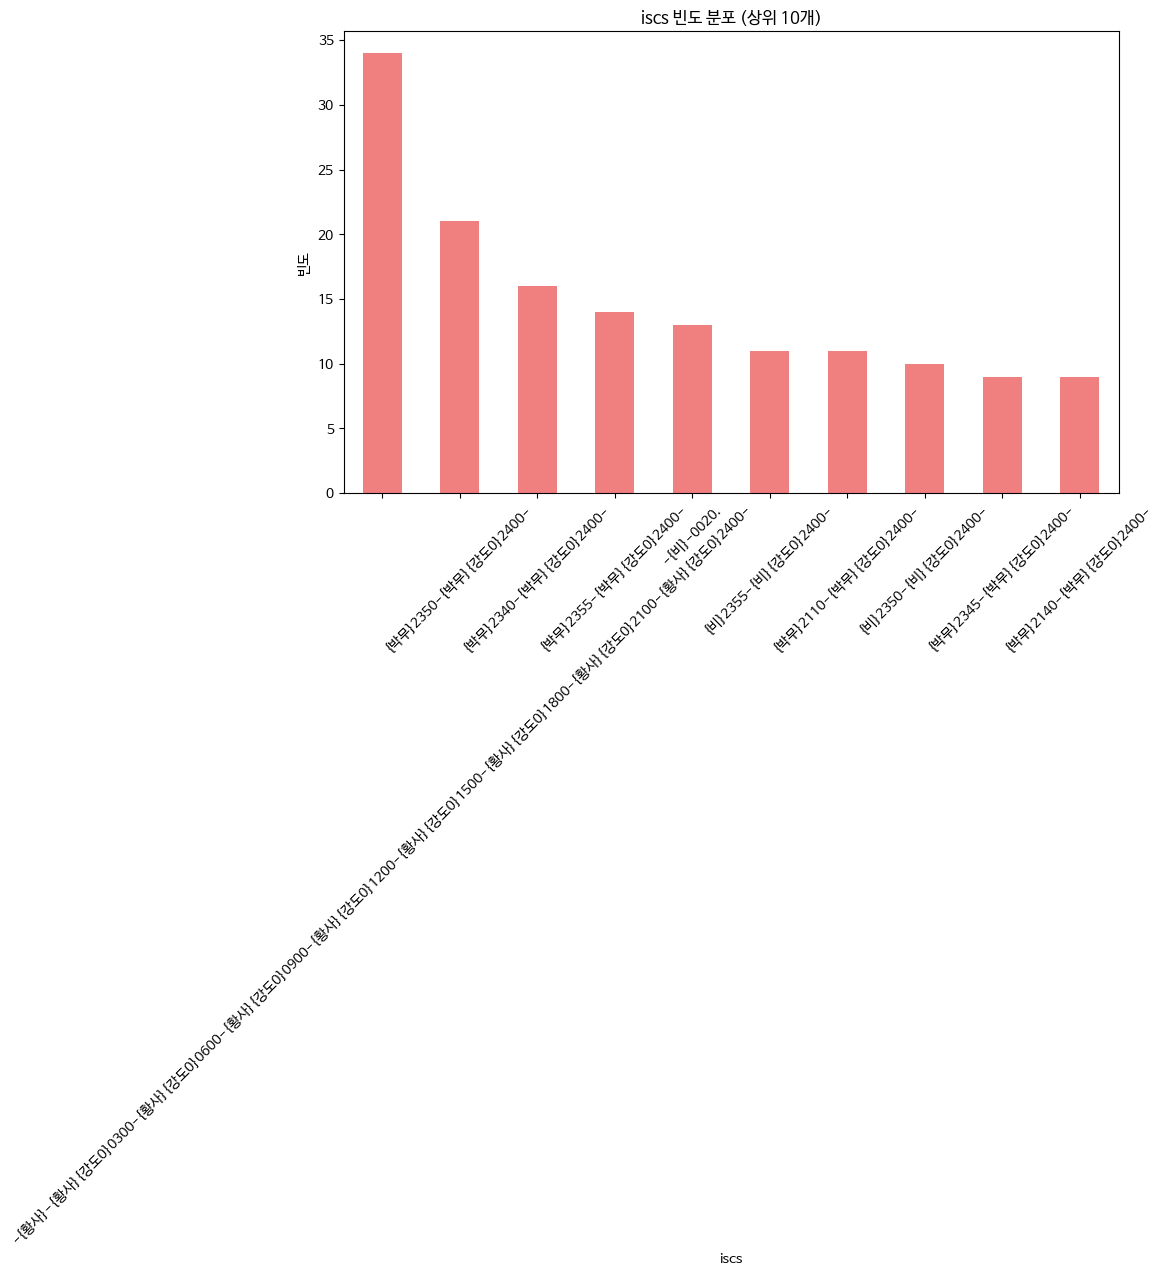

In [60]:
for col in categorical_cols:
    value_counts = df[col].value_counts()
    # 막대그래프 (상위 10개)
    plt.figure(figsize=(10, 6))
    top_10 = value_counts.head(10)
    top_10.plot(kind='bar', color='lightcoral')
    plt.title(f'{col} 빈도 분포 (상위 10개)')
    plt.xlabel(col)
    plt.ylabel('빈도')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

상관계수 행렬:
                   stnId     avgTa     minTa  minTaHrmt     maxTa  maxTaHrmt  \
stnId           1.000000  0.023309 -0.007070  -0.001042  0.062602   0.032950   
avgTa           0.023309  1.000000  0.977635  -0.108594  0.973247   0.067291   
minTa          -0.007070  0.977635  1.000000  -0.054553  0.912376   0.010238   
minTaHrmt      -0.001042 -0.108594 -0.054553   1.000000 -0.154172  -0.347907   
maxTa           0.062602  0.973247  0.912376  -0.154172  1.000000   0.119661   
maxTaHrmt       0.032950  0.067291  0.010238  -0.347907  0.119661   1.000000   
mi10MaxRn       0.022378  0.227421  0.263363   0.083289  0.168253  -0.077377   
mi10MaxRnHrmt   0.017138  0.043687  0.014166  -0.024444  0.076868  -0.038584   
hr1MaxRn        0.019900  0.171662  0.216908   0.085801  0.100057  -0.101797   
hr1MaxRnHrmt    0.031095  0.048413  0.025135  -0.016532  0.073211  -0.057044   
sumRnDur       -0.051935 -0.067027 -0.016782   0.134388 -0.122930  -0.232017   
sumRn           0.020214  0.209

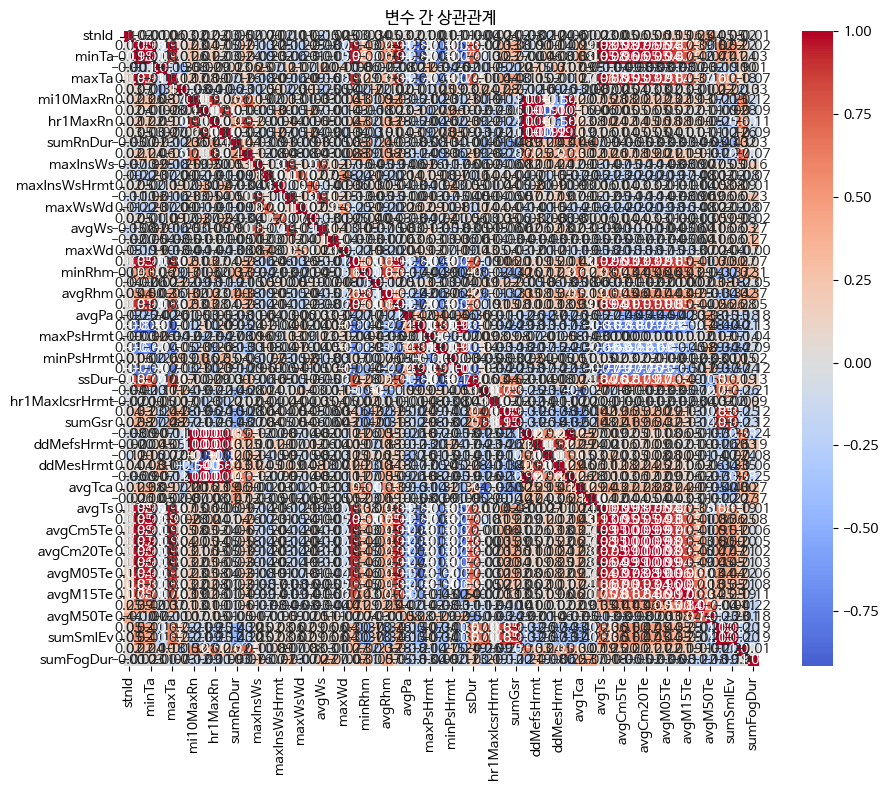

In [61]:
if len(numerical_cols) > 1:
    correlation_matrix = df[numerical_cols].corr()
    
    # 상관계수 출력
    print("상관계수 행렬:")
    print(correlation_matrix)
    print()
    
    # 상관계수 히트맵
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
               square=True, fmt='.2f')
    plt.title('변수 간 상관관계')
    plt.tight_layout()
    plt.show()

In [62]:
if len(numerical_cols) > 1:
    correlation_matrix = df[numerical_cols].corr()
        
    # 높은 상관관계를 가진 변수 쌍 찾기
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.6 and correlation_matrix.columns[i] != correlation_matrix.columns[j]:  # 상관계수 절댓값이 0.6 이상
                high_corr_pairs.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    corr_val
                ))
    if high_corr_pairs:
        print("높은 상관관계를 가진 변수 쌍 (|r| > 0.7):")
        for var1, var2, corr in high_corr_pairs:
            print(f"  {var1} - {var2}: {corr:.3f}")
    else:
        print("높은 상관관계를 가진 변수 쌍이 없습니다.")   
    

높은 상관관계를 가진 변수 쌍 (|r| > 0.7):
  avgTa - minTa: 0.978
  avgTa - maxTa: 0.973
  avgTa - avgTd: 0.952
  avgTa - avgPv: 0.915
  avgTa - maxPs: -0.816
  avgTa - minPs: -0.674
  avgTa - avgPs: -0.785
  avgTa - ssDur: 0.800
  avgTa - avgTs: 0.975
  avgTa - minTg: 0.954
  avgTa - avgCm5Te: 0.977
  avgTa - avgCm10Te: 0.974
  avgTa - avgCm20Te: 0.964
  avgTa - avgCm30Te: 0.955
  avgTa - avgM05Te: 0.936
  avgTa - avgM10Te: 0.867
  avgTa - avgM15Te: 0.777
  minTa - maxTa: 0.912
  minTa - avgTd: 0.960
  minTa - avgPv: 0.936
  minTa - maxPs: -0.820
  minTa - minPs: -0.674
  minTa - avgPs: -0.787
  minTa - ssDur: 0.768
  minTa - avgTs: 0.946
  minTa - minTg: 0.983
  minTa - avgCm5Te: 0.958
  minTa - avgCm10Te: 0.958
  minTa - avgCm20Te: 0.953
  minTa - avgCm30Te: 0.946
  minTa - avgM05Te: 0.936
  minTa - avgM10Te: 0.872
  minTa - avgM15Te: 0.787
  maxTa - avgTd: 0.901
  maxTa - avgPv: 0.853
  maxTa - maxPs: -0.769
  maxTa - minPs: -0.633
  maxTa - avgPs: -0.737
  maxTa - ssDur: 0.786
  maxTa - avgTs:

## 이상치 파악

In [64]:
if len(numerical_cols) > 0:
    outlier_summary = []
    
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percent = (outlier_count / len(df)) * 100
        
        outlier_summary.append({
            '변수': col,
            '이상치 개수': outlier_count,
            '이상치 비율(%)': round(outlier_percent, 2),
            '하한': round(lower_bound, 2),
            '상한': round(upper_bound, 2)
        })
        
        print(f"{col}:")
        print(f"  이상치 개수: {outlier_count}")
        print(f"  이상치 비율: {outlier_percent:.2f}%")
        print(f"  정상 범위: {lower_bound:.2f} ~ {upper_bound:.2f}")
        print()
    
    outlier_df = pd.DataFrame(outlier_summary)
    print("이상치 요약:")
    print(outlier_df)
else:
    print("이상치 분석을 위한 수치형 변수가 없습니다.")
print()


stnId:
  이상치 개수: 0
  이상치 비율: 0.00%
  정상 범위: -45.50 ~ 438.50

avgTa:
  이상치 개수: 2
  이상치 비율: 0.00%
  정상 범위: -18.15 ~ 46.25

minTa:
  이상치 개수: 0
  이상치 비율: 0.00%
  정상 범위: -25.70 ~ 44.70

minTaHrmt:
  이상치 개수: 39297
  이상치 비율: 23.23%
  정상 범위: -89.00 ~ 1343.00

maxTa:
  이상치 개수: 8
  이상치 비율: 0.00%
  정상 범위: -11.60 ~ 50.00

maxTaHrmt:
  이상치 개수: 13430
  이상치 비율: 7.94%
  정상 범위: 998.00 ~ 1822.00

mi10MaxRn:
  이상치 개수: 4361
  이상치 비율: 2.58%
  정상 범위: -3.50 ~ 6.10

mi10MaxRnHrmt:
  이상치 개수: 109
  이상치 비율: 0.06%
  정상 범위: -1588.00 ~ 3852.00

hr1MaxRn:
  이상치 개수: 4060
  이상치 비율: 2.40%
  정상 범위: -8.95 ~ 15.45

hr1MaxRnHrmt:
  이상치 개수: 447
  이상치 비율: 0.26%
  정상 범위: -1576.50 ~ 3739.50

sumRnDur:
  이상치 개수: 490
  이상치 비율: 0.29%
  정상 범위: -10.21 ~ 20.56

sumRn:
  이상치 개수: 7724
  이상치 비율: 4.57%
  정상 범위: -15.20 ~ 25.60

maxInsWs:
  이상치 개수: 5836
  이상치 비율: 3.45%
  정상 범위: -0.55 ~ 15.85

maxInsWsWd:
  이상치 개수: 0
  이상치 비율: 0.00%
  정상 범위: -85.00 ~ 515.00

maxInsWsHrmt:
  이상치 개수: 18661
  이상치 비율: 11.03%
  정상 범위: 427.00 ~ 2323.00

maxWs:
 

In [65]:
if len(numerical_cols) > 0:
    outlier_exist_summary = []
    
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percent = (outlier_count / len(df)) * 100
        
        if outlier_count > 0:
            outlier_exist_summary.append({
                '변수': col,
                '이상치 개수': outlier_count,
                '이상치 비율(%)': round(outlier_percent, 2),
                '하한': round(lower_bound, 2),
                '상한': round(upper_bound, 2)
            })
            
            print(f"{col}:")
            print(f"  이상치 개수: {outlier_count}")
            print(f"  이상치 비율: {outlier_percent:.2f}%")
            print(f"  정상 범위: {lower_bound:.2f} ~ {upper_bound:.2f}")
            print()
    
    outlier_exist_df = pd.DataFrame(outlier_exist_summary)
    print("이상치(있는 칼럼들만) 요약:")
    print(outlier_exist_df)

avgTa:
  이상치 개수: 2
  이상치 비율: 0.00%
  정상 범위: -18.15 ~ 46.25

minTaHrmt:
  이상치 개수: 39297
  이상치 비율: 23.23%
  정상 범위: -89.00 ~ 1343.00

maxTa:
  이상치 개수: 8
  이상치 비율: 0.00%
  정상 범위: -11.60 ~ 50.00

maxTaHrmt:
  이상치 개수: 13430
  이상치 비율: 7.94%
  정상 범위: 998.00 ~ 1822.00

mi10MaxRn:
  이상치 개수: 4361
  이상치 비율: 2.58%
  정상 범위: -3.50 ~ 6.10

mi10MaxRnHrmt:
  이상치 개수: 109
  이상치 비율: 0.06%
  정상 범위: -1588.00 ~ 3852.00

hr1MaxRn:
  이상치 개수: 4060
  이상치 비율: 2.40%
  정상 범위: -8.95 ~ 15.45

hr1MaxRnHrmt:
  이상치 개수: 447
  이상치 비율: 0.26%
  정상 범위: -1576.50 ~ 3739.50

sumRnDur:
  이상치 개수: 490
  이상치 비율: 0.29%
  정상 범위: -10.21 ~ 20.56

sumRn:
  이상치 개수: 7724
  이상치 비율: 4.57%
  정상 범위: -15.20 ~ 25.60

maxInsWs:
  이상치 개수: 5836
  이상치 비율: 3.45%
  정상 범위: -0.55 ~ 15.85

maxInsWsHrmt:
  이상치 개수: 18661
  이상치 비율: 11.03%
  정상 범위: 427.00 ~ 2323.00

maxWs:
  이상치 개수: 7431
  이상치 비율: 4.39%
  정상 범위: -0.25 ~ 8.95

maxWsHrmt:
  이상치 개수: 17218
  이상치 비율: 10.18%
  정상 범위: 420.00 ~ 2332.00

avgWs:
  이상치 개수: 9085
  이상치 비율: 5.37%
  정상 범위: -0.95 ~ 4.25

hr